In [1]:
!pip install ultralytics -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 863.7/863.7 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 25.0 MB/s eta 0:00:00


In [2]:
!cp '/content/drive/MyDrive/Colab Notebooks/store/hust/computer vision/project/20240614_145434.mp4' .

In [3]:
import cv2
import numpy as np
import random
import pandas as pd
from ultralytics import YOLO
path = '20240614_145434.mp4'


# Sử dụng mô hình Yolo 8
#model = YOLO("yolov8n.pt")
model = YOLO("yolov8m-seg.pt")

# Lấy video
cap = cv2.VideoCapture(path)

# Danh sách các ảnh bóng
pieces = []

# Duyệt qua các khung hình
for i in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
    ret, frame = cap.read()
    # nếu lấy được khung hình
    if ret:
      # dự đoán, nhân kết quả với độ tin cậy tối thiểu 50%
      results = model.predict(frame, conf=0.5)

      # chuyển ảnh thành màu đen
      frame[:] = (0, 0, 0)

      # đổ màu trắng vào đối tượng
      # giả sử trong khung hình chỉ có duy nhất đối tượng cần quan tâm
      for result in results:
        for mask, box in zip(result.masks.xy, result.boxes):
            points = np.int32([mask])
            # cv2.polylines(img, points, True, (255, 0, 0), 1)
            # đổ màu vào đối tượng
            cv2.fillPoly(frame, points, color=(255,255,255))
            pass

        # lấy khung đối tượng
        positions_frame = pd.DataFrame(result[0].cpu().numpy().boxes.data, columns = ['xmin', 'ymin', 'xmax', 'ymax', 'conf', 'class'])
        xmin, ymin, xmax, ymax, confidence, category = positions_frame.iloc[0].astype('int')
        #cv2.rectangle(frame, (xmin - 50, ymin - 50), (xmax + 50, ymax + 50), (255,0,0), 2)
        break

      # lấy 1 ảnh nhỏ
      piece = frame[ymin - 50 :ymax + 50, xmin - 50:xmax + 50]
      pieces.append(piece)
      pass



100%|██████████| 52.4M/52.4M [00:00<00:00, 184MB/s]



0: 640x320 1 person, 4336.4ms
Speed: 20.3ms preprocess, 4336.4ms inference, 40.2ms postprocess per image at shape (1, 3, 640, 320)

0: 640x320 1 person, 1835.1ms
Speed: 11.5ms preprocess, 1835.1ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 320)

0: 640x320 1 person, 1092.7ms
Speed: 3.9ms preprocess, 1092.7ms inference, 4.7ms postprocess per image at shape (1, 3, 640, 320)

0: 640x320 1 person, 1066.9ms
Speed: 3.5ms preprocess, 1066.9ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 320)

0: 640x320 1 person, 1077.4ms
Speed: 3.7ms preprocess, 1077.4ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 320)

0: 640x320 1 person, 1095.8ms
Speed: 4.3ms preprocess, 1095.8ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 320)

0: 640x320 1 person, 1099.7ms
Speed: 3.3ms preprocess, 1099.7ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 320)

0: 640x320 1 person, 1 backpack, 1118.5ms
Speed: 3.3ms preprocess, 1118.5ms inference,

In [4]:
# điều chỉnh kích thước phù hợp
resized_pieces = [cv2.resize(piece, (240, 390)) for piece in pieces]

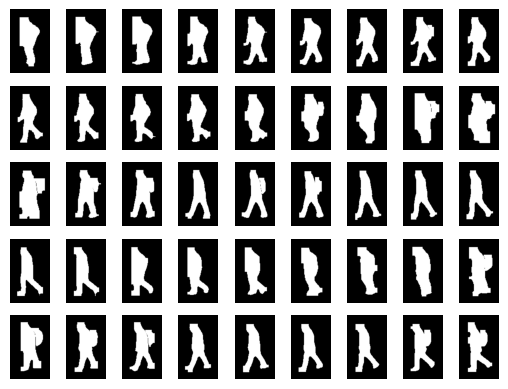

In [5]:
import matplotlib.pyplot as plt

for i in range(len(pieces)):
    plt.subplot(5, int(len(pieces) / 5) , i + 1)
    plt.imshow(resized_pieces[i])
    plt.axis('off')
plt.show()

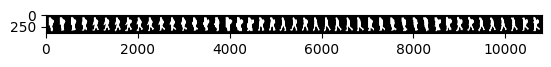

In [8]:
all_in_one = np.concatenate(resized_pieces, axis=1)
plt.imshow(all_in_one)

In [29]:
selection = []
selection.extend(resized_pieces[23:28])



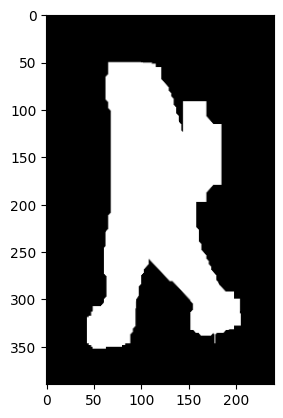

In [30]:
tmp = selection[0]
for i in range(1, len(selection)):
    tmp = np.bitwise_or(tmp, selection[i])
    pass
plt.imshow(tmp)